In [65]:
import MLNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data_with_dates = pd.read_csv('data/Spotter_Cleaned.csv')
data_with_dates.head(5)

,Dates,Significant Wave Height (m),Mean Period (s),Peak Direction (deg)
0,2021-04-06 00:40:00,0.716667,5.133333,183.346667
1,2021-04-06 01:40:00,0.716667,5.093333,180.480333
2,2021-04-06 02:40:00,0.716667,4.873333,174.565000
3,2021-04-06 03:40:00,0.710000,4.813333,173.071667
4,2021-04-06 04:40:00,0.743333,4.793333,172.935333


In [49]:
data_with_dates = pd.read_csv('data/Spotter_Cleaned.csv')
data = data_with_dates.iloc[:,1:]
data.head(5)

,Significant Wave Height (m),Mean Period (s),Peak Direction (deg)
0,0.716667,5.133333,183.346667
1,0.716667,5.093333,180.480333
2,0.716667,4.873333,174.565000
3,0.710000,4.813333,173.071667
4,0.743333,4.793333,172.935333


In [50]:
data.isna().sum()

Significant Wave Height (m)    0
Mean Period (s)                0
Peak Direction (deg)           0
dtype: int64

<Axes: >

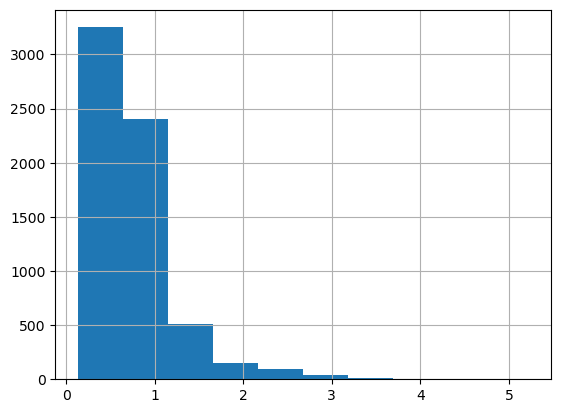

In [51]:
data['Significant Wave Height (m)'].hist()

<Axes: >

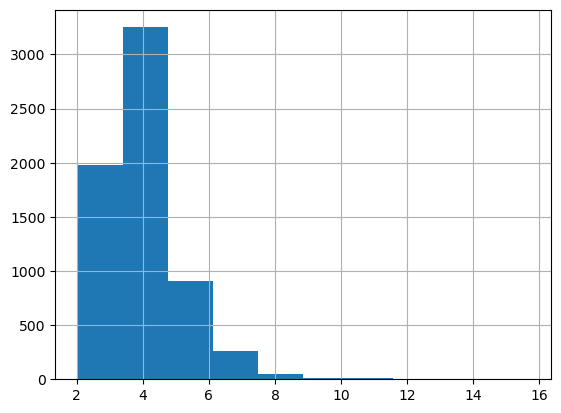

In [52]:
data['Mean Period (s)'].hist()

<Axes: >

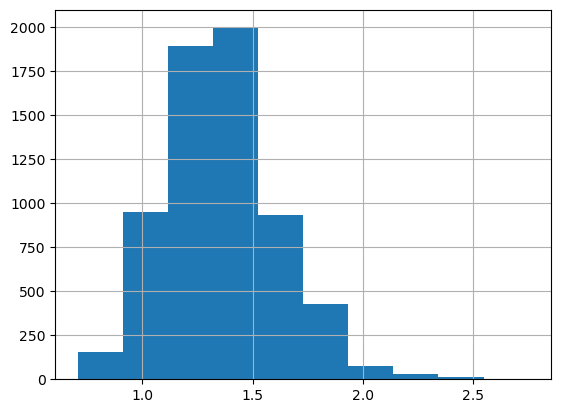

In [53]:
data['Mean Period (s)'] = np.log(data['Mean Period (s)'])
data['Mean Period (s)'].hist()

<Axes: >

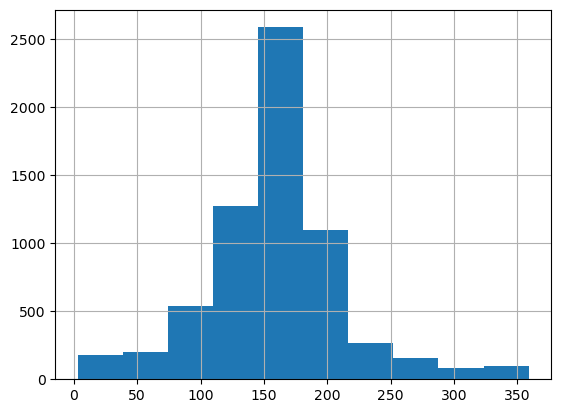

In [54]:
data['Peak Direction (deg)'].hist() 

In [55]:
data.head(5)

,Significant Wave Height (m),Mean Period (s),Peak Direction (deg)
0,0.716667,1.635755,183.346667
1,0.716667,1.627932,180.480333
2,0.716667,1.583778,174.565000
3,0.710000,1.571390,173.071667
4,0.743333,1.567226,172.935333


In [56]:
def normalize(x): return (x-np.mean(x))/np.std(x)

In [57]:
data['Mean Period (s)'] = normalize(data['Mean Period (s)'])
data['Peak Direction (deg)'] = normalize(data['Peak Direction (deg)'])
data.head(5)

,Significant Wave Height (m),Mean Period (s),Peak Direction (deg)
0,0.716667,1.073011,0.451537
1,0.716667,1.042483,0.398381
2,0.716667,0.870171,0.288682
3,0.710000,0.821826,0.260988
4,0.743333,0.805576,0.258460


In [60]:
Y = np.array(data['Significant Wave Height (m)'])
X = np.array(data[['Peak Direction (deg)', 'Mean Period (s)']])

In [61]:
num_epochs = 100
learn_rate = .01
network = MLNN.three_layer_NN(X,Y,4,2,1)
p, c = network.train(num_epochs,learn_rate, hidden_activation='sigmoid', output_activation='none', verbose=False)

Acc [93.19160414] | Error [6.80839586]


In [62]:
test_with_dates = pd.read_csv('data/NDBC_Cleaned.csv')
test_data = test_with_dates.iloc[:,1:]
test_data['APD'] = np.log(test_data['APD'])
test_data['APD'] = normalize(test_data['APD'])
test_data['MWD'] = normalize(test_data['MWD'])
Yt = np.array(test_data['WVHT'])
Xt = np.array(test_data[['MWD', 'APD']])

In [63]:
predictions = network.predict(Xt)
cost = np.square(predictions - Yt)
print(f'Acc {(1 - (np.sum(cost) / cost.size)) * 100} | Error {(np.sum(cost) / cost.size)*100}')

Acc 66.69054454360818 | Error 33.30945545639181


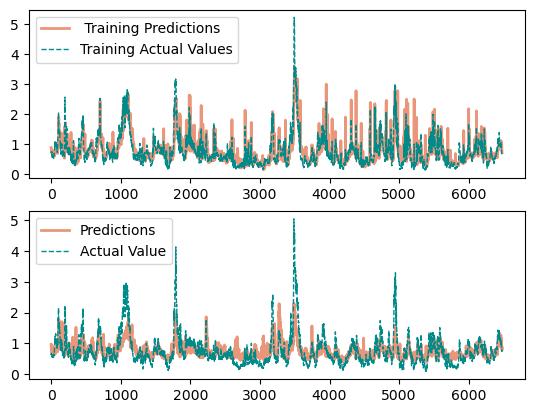

In [68]:
fig, ax = plt.subplots(nrows= 2, ncols=1)
ax[0].plot(range(len(X)), p,  linewidth=2.0, color='darksalmon' , label = ' Training Predictions')
ax[0].plot(range(len(X)), Y, '--',  linewidth=1.0, color='darkcyan', label = 'Training Actual Values')
ax[0].legend(loc="upper left")

ax[1].plot(range(len(Xt)), predictions, color='darksalmon', linewidth=2.0, label = 'Predictions')
ax[1].plot(range(len(Xt)), Yt, '--', color='darkcyan', linewidth=1.0, label = 'Actual Value')
ax[1].legend(loc="upper left")
plt.show()

Overfit